In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [43]:
df = pd.read_csv('D:/RADS 602_Data Mining and Machine Learning/Final_Assignment/risk_factors_cervical_cancer.csv', usecols = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann'])
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs,STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,?,?,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,?,?,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,?,?,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0,?,?,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,?,?,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,?,?,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0.0,0,?,?,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,?,?,0,0,0,0,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,?,?,0,0,0,0,0


In [44]:
df1 = df.replace('?', np.nan)
df1

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs,STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0,NaN,NaN,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0,NaN,NaN,0,0,0,0,0


In [45]:
df1.isnull().sum()

Age                                   0
Number of sexual partners            26
First sexual intercourse              7
Num of pregnancies                   56
Smokes                               13
Smokes (years)                       13
Smokes (packs/year)                  13
Hormonal Contraceptives             108
Hormonal Contraceptives (years)     108
IUD                                 117
IUD (years)                         117
STDs                                105
STDs (number)                       105
STDs: Number of diagnosis             0
STDs: Time since first diagnosis    787
STDs: Time since last diagnosis     787
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0
Dx                                    0
Hinselmann                            0
dtype: int64

In [46]:
imputer = KNNImputer(n_neighbors=5)
imputed_df = pd.DataFrame(imputer.fit_transform(df1))
imputed_df.columns = df1.columns
imputed_df.index = df1.index
imputed_df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs,STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,1.6,1.6,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,1.4,1.4,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,24.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,7.8,7.8,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,...,0.0,0.0,0.0,7.4,3.8,1.0,0.0,1.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,...,0.0,0.0,0.0,16.2,16.2,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,7.8,7.8,0.0,0.0,0.0,0.0,0.0
854,32.0,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0.0,11.0,11.0,0.0,0.0,0.0,0.0,0.0
855,25.0,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,3.6,3.6,0.0,0.0,0.0,0.0,0.0
856,33.0,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,4.8,4.8,0.0,0.0,0.0,0.0,0.0


In [47]:
imputed_df.isnull().sum()

Age                                 0
Number of sexual partners           0
First sexual intercourse            0
Num of pregnancies                  0
Smokes                              0
Smokes (years)                      0
Smokes (packs/year)                 0
Hormonal Contraceptives             0
Hormonal Contraceptives (years)     0
IUD                                 0
IUD (years)                         0
STDs                                0
STDs (number)                       0
STDs: Number of diagnosis           0
STDs: Time since first diagnosis    0
STDs: Time since last diagnosis     0
Dx:Cancer                           0
Dx:CIN                              0
Dx:HPV                              0
Dx                                  0
Hinselmann                          0
dtype: int64

In [48]:
imputed_df.dtypes

Age                                 float64
Number of sexual partners           float64
First sexual intercourse            float64
Num of pregnancies                  float64
Smokes                              float64
Smokes (years)                      float64
Smokes (packs/year)                 float64
Hormonal Contraceptives             float64
Hormonal Contraceptives (years)     float64
IUD                                 float64
IUD (years)                         float64
STDs                                float64
STDs (number)                       float64
STDs: Number of diagnosis           float64
STDs: Time since first diagnosis    float64
STDs: Time since last diagnosis     float64
Dx:Cancer                           float64
Dx:CIN                              float64
Dx:HPV                              float64
Dx                                  float64
Hinselmann                          float64
dtype: object

In [49]:
imputed_df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs,STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.524942,17.020979,2.268065,0.145221,1.217853,0.452950,0.640093,2.212012,0.109091,...,0.097436,0.162704,0.087413,5.357809,5.242191,0.020979,0.010490,0.020979,0.027972,0.040793
std,8.497948,1.650814,2.817155,1.424385,0.350405,4.061586,2.213833,0.457252,3.581401,0.298634,...,0.290042,0.530699,0.302545,3.915709,3.916925,0.143398,0.101939,0.143398,0.164989,0.197925
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.400000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.580000,0.000000,...,0.000000,0.000000,0.000000,4.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,7.800000,7.750000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,1.000000,4.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000


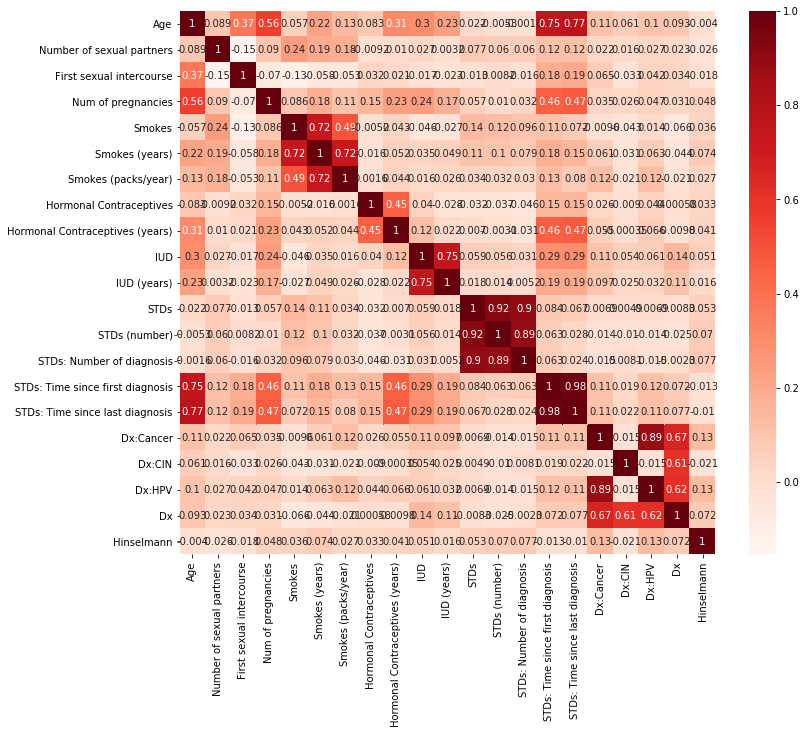

In [50]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = imputed_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [51]:
#Correlation with output variable
cor_target = abs(cor['Hinselmann'])
cor_target

Age                                 0.003967
Number of sexual partners           0.025616
First sexual intercourse            0.018278
Num of pregnancies                  0.048085
Smokes                              0.035622
Smokes (years)                      0.073556
Smokes (packs/year)                 0.027287
Hormonal Contraceptives             0.033480
Hormonal Contraceptives (years)     0.040708
IUD                                 0.050969
IUD (years)                         0.016414
STDs                                0.052640
STDs (number)                       0.070046
STDs: Number of diagnosis           0.076787
STDs: Time since first diagnosis    0.013435
STDs: Time since last diagnosis     0.010350
Dx:Cancer                           0.134264
Dx:CIN                              0.021233
Dx:HPV                              0.134264
Dx                                  0.072215
Hinselmann                          1.000000
Name: Hinselmann, dtype: float64

In [52]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.05]
relevant_features

Smokes (years)               0.073556
IUD                          0.050969
STDs                         0.052640
STDs (number)                0.070046
STDs: Number of diagnosis    0.076787
Dx:Cancer                    0.134264
Dx:HPV                       0.134264
Dx                           0.072215
Hinselmann                   1.000000
Name: Hinselmann, dtype: float64

In [53]:
relevant_features.index

Index(['Smokes (years)', 'IUD', 'STDs', 'STDs (number)',
       'STDs: Number of diagnosis', 'Dx:Cancer', 'Dx:HPV', 'Dx', 'Hinselmann'],
      dtype='object')

In [54]:
df2 = imputed_df[relevant_features.index]
df2

,Smokes (years),IUD,STDs,STDs (number),STDs: Number of diagnosis,Dx:Cancer,Dx:HPV,Dx,Hinselmann
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


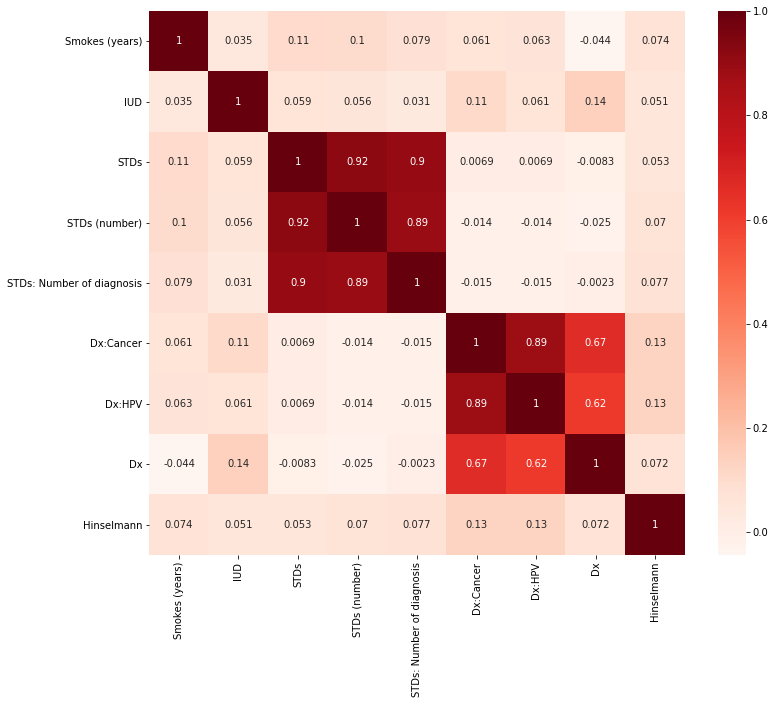

In [55]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [56]:
df2 = df2.drop(['STDs', 'STDs (number)', 'Dx:HPV', 'Dx'], axis=1)
df2

,Smokes (years),IUD,STDs: Number of diagnosis,Dx:Cancer,Hinselmann
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,37.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
853,0.0,0.0,0.0,0.0,0.0
854,0.0,0.0,0.0,0.0,0.0
855,0.0,0.0,0.0,0.0,0.0
856,0.0,0.0,0.0,0.0,0.0


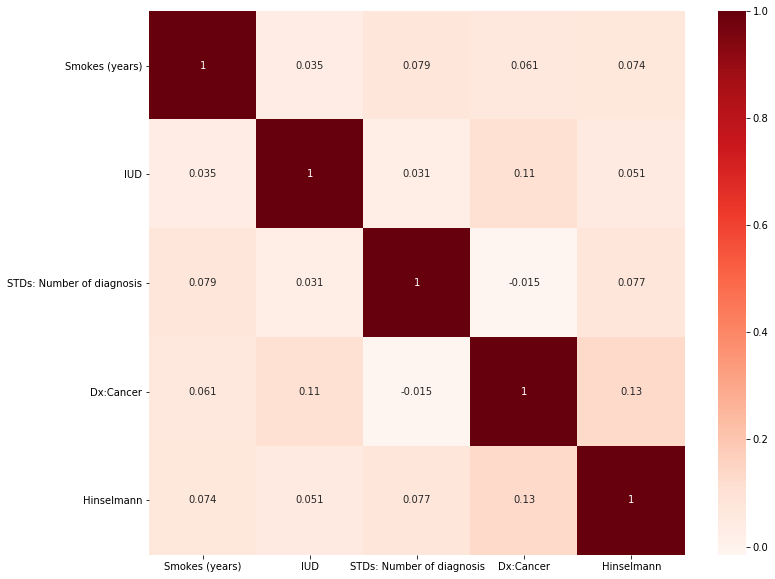

In [57]:
#Using Pearson Correlation to remove the values that >= 0.3
plt.figure(figsize=(12,10))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

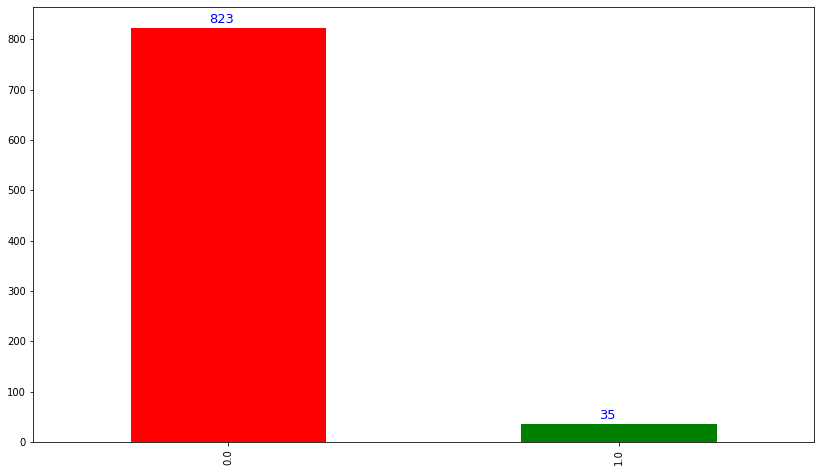

In [58]:
ax = df2['Hinselmann'].value_counts().plot(kind='bar', figsize=(14,8), color = list('rgbkymc'))
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()+10, str(round((i.get_height()), 2)), fontsize=13, color='blue')

In [59]:
y = df2['Hinselmann']
X = df2.drop(['Hinselmann'], axis=1)
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
y_resampled

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1641    1.0
1642    1.0
1643    1.0
1644    1.0
1645    1.0
Name: Hinselmann, Length: 1646, dtype: float64

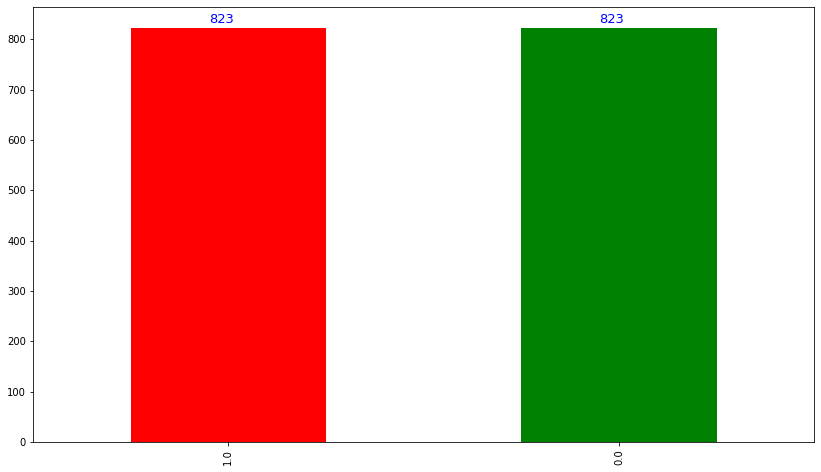

In [60]:
ax = y_resampled.value_counts().plot(kind='bar', figsize=(14,8), color = list('rgbkymc'))
for i in ax.patches:
    ax.text(i.get_x()+0.2, i.get_height()+10, str(round((i.get_height()), 2)), fontsize=13, color='blue')

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Smokes (years),IUD,STDs: Number of diagnosis,Dx:Cancer
7,0.0,1.0,0.0,0.0
192,0.0,0.0,0.0,0.0
155,11.0,0.0,0.0,0.0
319,0.0,0.0,0.0,0.0
101,0.0,1.0,1.0,0.0
...,...,...,...,...
71,0.0,0.4,0.0,0.0
106,0.0,0.0,0.0,0.0
270,0.0,0.0,0.0,0.0
435,0.0,0.0,0.0,0.0


In [62]:
logclassifier = LogisticRegression()
log_hyperparams = {'C': [ 0.0001, 0.001, 0.01, 0.1, 1], 'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga']}
log_scores = ['precision', 'recall', 'accuracy']

for log_score in log_scores:
    log_model = RandomizedSearchCV(logclassifier, log_hyperparams, random_state=0, scoring= '%s' % log_score)
    log_model.fit(X_train, y_train)
    print('Best Parameters of %s score = %.3f is %s' % (log_score, log_model.best_score_, log_model.best_params_))

C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to cont

C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and be

Best Parameters of precision score = 0.000 is {'solver': 'sag', 'C': 1}


C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\linear_model\_sag.py:3

Best Parameters of recall score = 0.000 is {'solver': 'sag', 'C': 1}


C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\linear_model\_sag.py:3

Best Parameters of accuracy score = 0.961 is {'solver': 'sag', 'C': 1}


In [63]:
log_y_pred = log_model.best_estimator_.predict(X_test)
log_confusion = confusion_matrix(y_test,y_pred)

# True Positives
log_TP = log_confusion[1, 1]

# True Negatives
log_TN = log_confusion[0, 0]

# False Positives
log_FP = log_confusion[0, 1]

# False Negatives
log_FN = log_confusion[1, 0]

print('Confusion matrix: ', log_confusion)
print(classification_report(y_test, log_y_pred))
print('Test accuracy: %.3f' % ((log_TP + log_TN) / float(log_TP + log_TN + log_FP + log_FN)))
print('Test sensitivity: %.3f' % (log_TP / float(log_TP + log_FN)))
print('Test specificity: %.3f' % (log_TN / float(log_TN + log_FP)))

Confusion matrix:  [[164   0]
 [  8   0]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       164
         1.0       0.00      0.00      0.00         8

    accuracy                           0.95       172
   macro avg       0.48      0.50      0.49       172
weighted avg       0.91      0.95      0.93       172

Test accuracy: 0.953
Test sensitivity: 0.000
Test specificity: 1.000


C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
knnclassifier = KNeighborsClassifier()
knn_hyperparams = {'n_neighbors': [1, 2, 4, 6, 8, 10, 12], 'leaf_size': [1, 2, 3, 5], 'p': [1, 2]}
knn_scores = ['precision', 'recall', 'accuracy']

for knn_score in knn_scores:
    knn_model = RandomizedSearchCV(knnclassifier, knn_hyperparams, random_state=0, scoring= '%s' % knn_score)
    knn_model.fit(X_train, y_train)
    print('Best Parameters of %s score = %.3f is %s' % (knn_score, knn_model.best_score_, knn_model.best_params_))

C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics

C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics

Best Parameters of precision score = 0.000 is {'p': 2, 'n_neighbors': 2, 'leaf_size': 5}
Best Parameters of recall score = 0.000 is {'p': 2, 'n_neighbors': 2, 'leaf_size': 5}
Best Parameters of accuracy score = 0.961 is {'p': 2, 'n_neighbors': 2, 'leaf_size': 5}


In [65]:
knn_y_pred = knn_model.best_estimator_.predict(X_test)
knn_confusion = confusion_matrix(y_test,y_pred)

# True Positives
knn_TP = knn_confusion[1, 1]

# True Negatives
knn_TN = knn_confusion[0, 0]

# False Positives
knn_FP = knn_confusion[0, 1]

# False Negatives
knn_FN = knn_confusion[1, 0]

print('Confusion matrix: ', knn_confusion)
print(classification_report(y_test, knn_y_pred))
print('Test accuracy: %.3f' % ((knn_TP + knn_TN) / float(knn_TP + knn_TN + knn_FP + knn_FN)))
print('Test sensitivity: %.3f' % (knn_TP / float(knn_TP + knn_FN)))
print('Test specificity: %.3f' % (knn_TN / float(knn_TN + knn_FP)))

Confusion matrix:  [[164   0]
 [  8   0]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       164
         1.0       0.00      0.00      0.00         8

    accuracy                           0.95       172
   macro avg       0.48      0.50      0.49       172
weighted avg       0.91      0.95      0.93       172

Test accuracy: 0.953
Test sensitivity: 0.000
Test specificity: 1.000


C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
svclassifier = SVC(kernel='linear')
svc_hyperparams = {'C': [1,2,4,6,8,10,12], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
svc_scores = ['precision', 'recall', 'accuracy']

for svc_score in svc_scores:
    svc_model = RandomizedSearchCV(svclassifier, svc_hyperparams, random_state=0, scoring= '%s' % svc_score)
    svc_model.fit(X_train, y_train)
    print('Best Parameters of %s score = %.3f is %s' % (svc_score, svc_model.best_score_, svc_model.best_params_))

C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics

C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics

Best Parameters of precision score = 0.000 is {'gamma': 0.0001, 'C': 10}
Best Parameters of recall score = 0.000 is {'gamma': 0.0001, 'C': 10}
Best Parameters of accuracy score = 0.961 is {'gamma': 0.0001, 'C': 10}


In [67]:
svc_y_pred = svc_model.best_estimator_.predict(X_test)
svc_confusion = confusion_matrix(y_test,y_pred)

# True Positives
svc_TP = svc_confusion[1, 1]

# True Negatives
svc_TN = svc_confusion[0, 0]

# False Positives
svc_FP = svc_confusion[0, 1]

# False Negatives
svc_FN = svc_confusion[1, 0]

print('Confusion matrix: ', svc_confusion)
print(classification_report(y_test, svc_y_pred))
print('Test accuracy: %.3f' % ((svc_TP + svc_TN) / float(svc_TP + svc_TN + svc_FP + svc_FN)))
print('Test sensitivity: %.3f' % (svc_TP / float(svc_TP + svc_FN)))
print('Test specificity: %.3f' % (svc_TN / float(svc_TN + svc_FP)))

Confusion matrix:  [[164   0]
 [  8   0]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       164
         1.0       0.00      0.00      0.00         8

    accuracy                           0.95       172
   macro avg       0.48      0.50      0.49       172
weighted avg       0.91      0.95      0.93       172

Test accuracy: 0.953
Test sensitivity: 0.000
Test specificity: 1.000


C:\Users\telep\Anaconda3\envs\math_stat\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
